## Importing Libraries

 - Importing necessary libraries for the assigment.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

 - Pandas is used loading and viewing our dataset, also to process, clean and manipulate dataset.
 - Seaborn and Matplotlib to plot and visualize dataset.

## Load Dataset

 - Using pandas feature 'pd.read_csv()' we can load a .csv extension dataset from our computer.
 - In Jupyter Notebook, because this ipynb file has the same location as the csv which we want to load, then it will automatically be loaded just by specifying the name of the dataset.
 - Also, here i give additional option to pandas to display all of the dataset's columns, because by default, pandas only display several and not all of them.

In [2]:
df = pd.read_csv('Telcom.csv')
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Checking For Missing Values

 - Check to see if there's any missing value from our dataset.
 - Here we are going to make  a new dataframe consisting of 'Filling Factor', which counts how much is the missing value in dataset for a given columns. It is set in percentage.

In [3]:
missing_data = df.isna().sum(axis=0).reset_index()
missing_data.columns = ['Variable', 'Missing values']
missing_data['Filling factor (%)']=(df.shape[0]-missing_data['Missing values'])/df.shape[0]*100
missing_data.sort_values('Filling factor (%)').reset_index(drop = True)

,Variable,Missing values,Filling factor (%)
0,customerID,0,100.0
1,MonthlyCharges,0,100.0
2,PaymentMethod,0,100.0
3,PaperlessBilling,0,100.0
4,Contract,0,100.0
5,StreamingMovies,0,100.0
6,StreamingTV,0,100.0
7,TechSupport,0,100.0
8,DeviceProtection,0,100.0
9,TotalCharges,0,100.0


 - As we can see, dataset contains no missing values.
 - However, we may want to cross-check if there's legit no missing value in dataset.
 - We may want to check aside of missing values, we have to consider a blank space (' ') as a missing value as well.
 - We apply lambda function to do so.

In [4]:
df.apply(lambda x : x == ' ').sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

 - We can see it very clearly in TotalCharges there are 11 blank spaces.
 - There are defiintely missing values in dataset.
 - Locating datas with the blank spaces in dataset, using filter and then locating them with df.loc. 

In [5]:
filt = (df['TotalCharges'] == ' ')
df.loc[filt]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


 - We can now confirm there are 11 blank spaces in TotalCharges.
 - The data needs to be cleaned of missing value, proceed to data cleaning.

## Data Cleaning 

 - This process can be done by simply filling the blank space in TotaCharges variable by 0. Using the similar lambda method just like the above, we can replace the blank spaces by the value of 0.
 - However, first we have to confirm the columns type of TotalCharges. Using df.types, we can see what types that variable falls into.

In [6]:
df['TotalCharges'].dtypes

dtype('O')

 - The variable is still in object / string. Have to change it to either integer or float before. Now we know from dataset preview that some of the values of this variable are decimal, then float is the choice.
 - Next, is we replace the blank spaces by 0.0, because we choose float as our type for TotalCharges.
 - Using df.replace() to change blank spaces (' ') to ('0.0'), and then locate the replaced datas by df.loc.

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace([' '],['0.0'])
df.loc[(df['TotalCharges'] == '0.0')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


 - We can see now that the initial blank spaces of the variable have now been replaced by the 0.0's. 
 - This time we can properly change TotalCharges variable into its proper type, float.

In [8]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtypes

dtype('float64')

 - Confirmed that the variables has been changed to float type.

## Visualization

 - Next we want to visualize and compare each response's value from the Churn variable (Churn and Not Churn).
 - Setting up a new dataframe to count the needed values.

In [39]:
# Defining speficif values to be calculated
ChurnYes = (df['Churn'] == 'Yes').sum()
ChurnNo = (df["Churn"] == 'No').sum()
Churncount = ((df['Churn'] == 'Yes') | (df['Churn'] == 'No')).sum()
ChurnPercentage1 = (ChurnYes/Churncount)*100
ChurnPercentage2 = (ChurnNo/Churncount)*100

# Setting up new dataframe based on the
# values above
df_Churn = pd.DataFrame({'ChurnType' : ['Churn','Non Churn'],
                        'Count' : [ChurnYes,ChurnNo],
                        'Percentage' : [ChurnPercentage1,ChurnPercentage2]})
df_Churn

,ChurnType,Count,Percentage
0,Churn,1869,26.536987
1,Non Churn,5174,73.463013


 - There are 2 type of customers (subscribers) based on Churn column. Churn, refers to a person who at some point after using the company's services decided not to prolong their subscription of the service. Meanwhile, Non churn, refers to person who is still using the company's serice as of this dataset published.
 - There are a total of 7043 customers, 1869 of which have stopped using the company's service, while the other 5174 are still using the service.

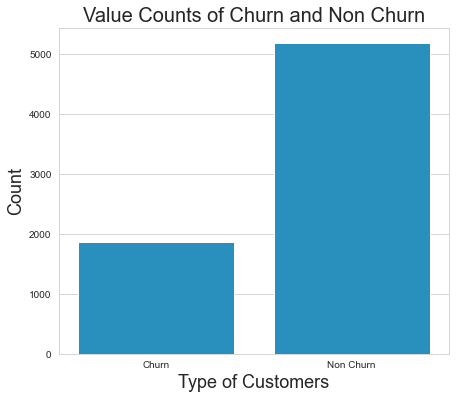

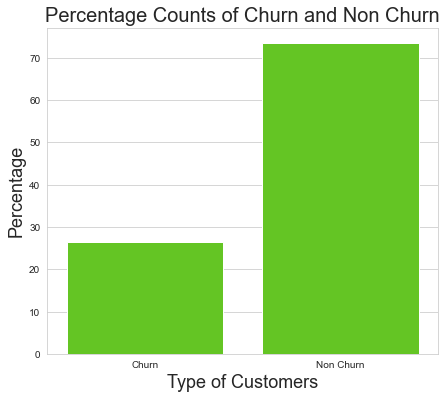

In [58]:
# Count Comparison
plt.figure(figsize=(7,6))
ax1 = sns.barplot(x='ChurnType', y='Count', data=df_Churn, color='#1199d5', orient='v')
sns.set_style('whitegrid')
ax1.set_title("Value Counts of Churn and Non Churn", fontsize = 20)
ax1.set_xlabel("Type of Customers", fontsize = 18)
ax1.set_ylabel("Count", fontsize = 18)
plt.show()


# Percentage Count Comparison
plt.figure(figsize=(7,6))
ax2 = sns.barplot(x='ChurnType', y='Percentage', data=df_Churn, color='#5ee009', orient='v')
sns.set_style('whitegrid')
ax2.set_title("Percentage Counts of Churn and Non Churn", fontsize = 20)
ax2.set_xlabel("Type of Customers", fontsize = 18)
ax2.set_ylabel("Percentage", fontsize = 18)
plt.show()

 - Now we want to visualize and compare the distribution for TotalCharges and Churn from dataset.

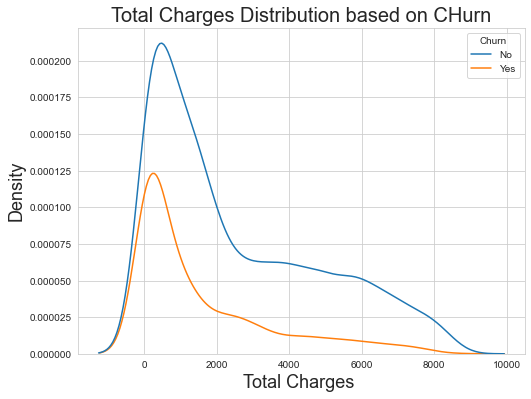

In [69]:
# Distribution of values 
plt.figure(figsize=(8,6))
ax3 = sns.kdeplot(df['TotalCharges'], hue = df['Churn']);
sns.set_style('whitegrid')
ax3.set_title("Total Charges Distribution based on CHurn", fontsize = 20)
ax3.set_xlabel("Total Charges ", fontsize = 18)
ax3.set_ylabel("Density", fontsize = 18)
plt.show()